# Optimal number of edges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

Comments:
* Here we train and test everything on same two arbitrarily selected Lorenzes data, to honestly see how much variability comes from the model itseld.

Conclusions:
* Going to distributed inhibition increases the loss a lot (about 3 times), but even then, some graphs produce decent losses. So maybe it's harder to stumble upon a solution, but solutions do seem to exist.
* While for alternating edges, optimal performance happened around 1000 edges in a 100-nodes network (~20% of all possible edges), for distributed inhibition performance is almost completely flat. Which suggests that at least for networks of this size, 20% may be a good value.

In [47]:
# Experiments with rho, with fixed normalization strength

data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_length = 10000
test_length = 1000
n_units = 100
rho = 0.8           # 0.8 is optimal for alternating weights
l2 = 0.0001         # Optimal value seems ot be 0, but that feeils weird
n_experiments = 20

n_edgeses = list(range(100,5000, 500))

loss_train = np.zeros((len(n_edgeses), n_experiments))
loss_test = np.zeros(loss_train.shape)

seeds = np.random.uniform(size=n_experiments) # We always train on same data, but with different networks

for (i, n_edges) in enumerate(n_edgeses):
    for i_exp in range(n_experiments):
        #seed = seeds[i_exp]
        seed = [1,0,0]
        x1,y1 = data.generate(points_to_skip + training_signal_length, seed=seed)
        x2,y2 = data.generate(points_to_skip + training_signal_length, seed=[10,5,5])

        model = esn.Reservoir(n_units, n_edges=n_edges, rho=rho, l2=l2, network_type='erdos',
        #                     inhibition='alternating', weights_in='alternating')
                               inhibition='distributed', weights_in='alternating')
        #                     inhibition='distributed', weights_in='flat')
        model.fit(x1, y1, skip=points_to_skip)

        # Training data loss    
        z = model.predict(x1, length=points_to_skip+test_length)     
        loss_train[i, i_exp] = esn.utils.loss(y1[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])        

        # Testing loss        
        z = model.predict(x2, length=points_to_skip+test_length)     
        loss_test[i, i_exp] = esn.utils.loss(y2[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
        print('.', end='')
    print('|', end='')
print('\nDone')

....................|....................|....................|....................|....................|....................|....................|....................|....................|....................|
Done


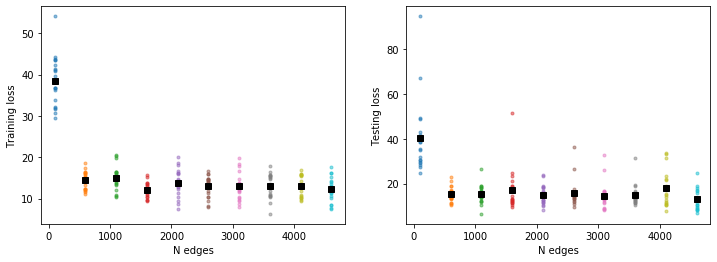

In [44]:
# Transsections
def plot1d(xs, y, xlabel=None, ylabel=None, title=None):
    y = np.squeeze(y) # We expect sngleton dimensions here    
    for i,x in enumerate(xs):
        plt.plot(x*np.ones(y.shape[1]), y[i,:], '.', alpha=0.5)
        plt.plot(x, np.mean(y[i,:]), 'sk')    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
        
plt.figure(figsize=(12,4))
plt.subplot(121)
plot1d(n_edgeses, loss_train, 'N edges', 'Training loss')
plt.subplot(122)
plot1d(n_edgeses, loss_test, 'N edges', 'Testing loss')

### Saved plots for a model that has input weights alternating, but internal - with distributed inhibition

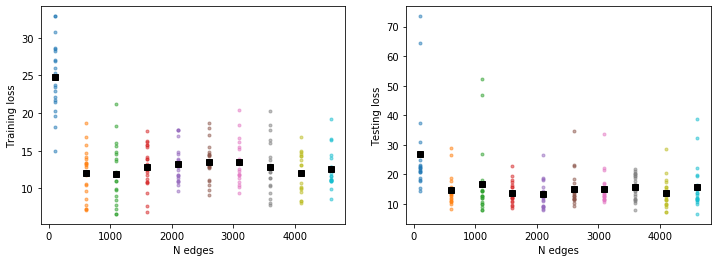

In [48]:
# Transsections        
plt.figure(figsize=(12,4))
plt.subplot(121)
plot1d(n_edgeses, loss_train, 'N edges', 'Training loss')
plt.subplot(122)
plot1d(n_edgeses, loss_test, 'N edges', 'Testing loss')

### Saved graphs for standard echos (erdos, with all weights alternating)

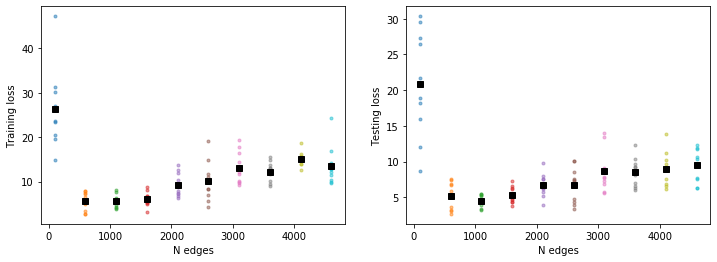

In [40]:
# Transsections
        
plt.figure(figsize=(12,4))
plt.subplot(121)
plot1d(n_edgeses, loss_train, 'N edges', 'Training loss')
plt.subplot(122)
plot1d(n_edgeses, loss_test, 'N edges', 'Testing loss')